# Import Libraries

In [ ]:
#using the library to alter the data-set.
import pandas as ppd
#bringing in the infor-mation calculation methods
import numpy as nym
#Here, the libraries serve to draw the graph.
import seaborn as sns
#used this visualization library to create visual representations
import matplotlib.pyplot as mpl
# for scalling information-set we use the library
from sklearn.preprocessing import MinMaxScaler
# here we using the splitting module for dividing information
from sklearn.model_selection import train_test_split
# Importing variousn from the  module
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,auc,confusion_matrix,classification_report
# Suppress all caustions
import warnings
warnings.filterwarnings("ignore")

# Reading Test Dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# executing the information of examined data.
cic_ids_2017 =ppd.read_csv('/content/drive/MyDrive/Code/combined.csv')
cic_ids_2017.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
cic_ids_2017.shape

(2830743, 79)

In [ ]:
# Randomly shuffle the rows of the DataFrame `cic_ids_2017`.
# The `frac=1` ensures that 100% of the data is sampled, which effectively shuffles the entire dataset.
# `reset_index(drop=True)` resets the index of the shuffled DataFrame, removing the old index and avoiding adding it as a new column.
cic_ids_2017 = cic_ids_2017.sample(frac=1).reset_index(drop=True)

# Display the shape of the DataFrame again to confirm that the number of rows and columns remain the same after shuffling.
cic_ids_2017.shape


(2830743, 79)

In [ ]:
# Count the occurrences of each unique value in the 'Label' column of the DataFrame `cic_ids_2017`.
# This gives a breakdown of how many instances belong to each class or category (e.g., attack types or normal traffic).
cic_ids_2017[' Label'].value_counts()


,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [ ]:
# Create a new dataframe with the specified class distributions.
benign_df = cic_ids_2017[cic_ids_2017[' Label'] == 'BENIGN'].sample(n=25000, random_state=42)
dos_hulk_df = cic_ids_2017[cic_ids_2017[' Label'] == 'DoS Hulk'].sample(n=23107, random_state=42)
portscan_df = cic_ids_2017[cic_ids_2017[' Label'] == 'PortScan'].sample(n=15893, random_state=42)
ddos_df = cic_ids_2017[cic_ids_2017[' Label'] == 'DDoS'].sample(n=12802, random_state=42)

# Get the remaining classes with their original counts.
remaining_classes = cic_ids_2017[~cic_ids_2017[' Label'].isin(['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS'])]

# Combine the sampled dataframes.
new_cicids = ppd.concat([benign_df, dos_hulk_df, portscan_df, ddos_df, remaining_classes], axis=0)

# Shuffle the new dataframe.
new_cicids = new_cicids.sample(frac=1).reset_index(drop=True)
new_cicids.shape

(116418, 79)

In [ ]:
# Count the occurrences of each unique value in the 'Label' column of the DataFrame `cic_ids_2017`.
# This gives a breakdown of how many instances belong to each class or category (e.g., attack types or normal traffic).
new_cicids[' Label'].value_counts()

cicids = new_cicids

In [ ]:
# Replace occurrences of the value 'Web Attack � Brute Force' in the 'Label' column.
# with the new value 'Attack_Brute Force' to standardize and simplify the label names.
cicids[' Label'] = cicids[' Label'].replace('Web Attack � Brute Force', 'Attack_Brute Force')

# Similarly, replace 'Web Attack � Sql Injection' with 'Attack_Sql Injection' in the 'Label' column.
cicids[' Label'] = cicids[' Label'].replace('Web Attack � Sql Injection', 'Attack_Sql Injection')

# Finally, replace 'Web Attack � XSS' with 'Attack_XSS' to standardize this attack label in the 'Label' column.
cicids[' Label'] = cicids[' Label'].replace('Web Attack � XSS', 'Attack_XSS')


In [ ]:
# Print the number of unique values in the 'Label' column of the DataFrame `cicids`.
# This provides information on how many distinct classes or categories are present in the dataset.
print(len(cicids[' Label'].unique()))

# Print a separator line for better readability of the output.
print('=========================================')

# Print the unique values in the 'Label' column to see the distinct labels or categories in the dataset.
print(cicids[' Label'].unique())


15
['BENIGN' 'PortScan' 'DoS Hulk' 'FTP-Patator' 'DDoS' 'Attack_Brute Force'
 'DoS GoldenEye' 'SSH-Patator' 'DoS Slowhttptest' 'Bot' 'DoS slowloris'
 'Attack_XSS' 'Attack_Sql Injection' 'Infiltration' 'Heartbleed']


In [ ]:
# Calculate the total number of missing (null) values in the entire DataFrame `cicids`.
# `isnull()` creates a DataFrame of the same shape with boolean values indicating where values are missing.
# `sum()` applied twice first counts missing values per column and then sums these counts across all columns.
cicids.isnull().sum().sum()


86

In [ ]:
# Remove all rows with missing (null) values from the DataFrame `cicids`.
# `inplace=True` modifies the original DataFrame directly without needing to assign the result to a new variable.
cicids.dropna(inplace=True)

# Remove all duplicate rows from the DataFrame `cicids`.
# `inplace=True` ensures that the original DataFrame is updated in place, removing any exact duplicate rows.
cicids.drop_duplicates(inplace=True)


In [ ]:
# Display the shape of the DataFrame `cicids` after removing missing values and duplicates.
# This shows the number of rows and columns in the updated DataFrame.
cicids.shape


(103908, 79)

In [ ]:
# Calculate the total number of missing (null) values in the DataFrame `cicids` after dropping rows with null values.
# This ensures that there are no remaining missing values in the DataFrame.
cicids.isnull().sum().sum()


0

In [ ]:
# Count the occurrences of each unique value in the 'Label' column of the DataFrame `cicids`.
# This provides a summary of the distribution of different classes or categories in the dataset.
cicids[' Label'].value_counts()


,count
Label,
BENIGN,24726
DoS Hulk,17688
PortScan,14499
DDoS,12801
DoS GoldenEye,10286
FTP-Patator,5933
DoS slowloris,5385
DoS Slowhttptest,5228
SSH-Patator,3219


In [ ]:
# Display the shape of the DataFrame `cicids` to show the number of rows and columns.
# This provides an overview of the current size of the DataFrame after any data cleaning or manipulation.
cicids.shape


(103908, 79)

In [ ]:
import numpy as np

# Check for infinite values.
print(cicids.isin([np.inf, -np.inf]).any().any())

True


In [ ]:
# Check for infinite values in each column.
print(cicids.isin([np.inf, -np.inf]).any())

 Destination Port              False
 Flow Duration                 False
 Total Fwd Packets             False
 Total Backward Packets        False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
 Idle Std                      False
 Idle Max                      False
 Idle Min                      False
 Label                         False
Length: 79, dtype: bool


In [ ]:
import pandas as pd
import numpy as np

# Replace infinite values with NaN.
cicids.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values.
cicids.dropna(inplace=True)



In [ ]:
cicids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103874 entries, 0 to 116417
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             103874 non-null  int64  
 1    Flow Duration                103874 non-null  int64  
 2    Total Fwd Packets            103874 non-null  int64  
 3    Total Backward Packets       103874 non-null  int64  
 4   Total Length of Fwd Packets   103874 non-null  int64  
 5    Total Length of Bwd Packets  103874 non-null  int64  
 6    Fwd Packet Length Max        103874 non-null  int64  
 7    Fwd Packet Length Min        103874 non-null  int64  
 8    Fwd Packet Length Mean       103874 non-null  float64
 9    Fwd Packet Length Std        103874 non-null  float64
 10  Bwd Packet Length Max         103874 non-null  int64  
 11   Bwd Packet Length Min        103874 non-null  int64  
 12   Bwd Packet Length Mean       103874 non-null  fl

In [ ]:
cicids.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,103874.000000,1.038740e+05,103874.000000,103874.000000,1.038740e+05,1.038740e+05,103874.000000,103874.000000,103874.000000,103874.000000,...,103874.000000,103874.000000,1.038740e+05,1.038740e+05,1.038740e+05,1.038740e+05,1.038740e+05,1.038740e+05,1.038740e+05,1.038740e+05
mean,3804.965294,2.689174e+07,6.416755,5.721894,5.977271e+02,5.734610e+03,183.517050,8.212941,46.120728,65.658128,...,2.969290,28.222577,3.395211e+05,1.142714e+05,4.326163e+05,2.586308e+05,1.978053e+07,1.529432e+06,2.133057e+07,1.862792e+07
std,12136.409555,3.974968e+07,52.548158,52.984908,1.576052e+04,1.076842e+05,544.815621,53.429054,144.528030,189.230961,...,37.611569,6.920455,1.348571e+06,7.685789e+05,1.666960e+06,1.240757e+06,3.554637e+07,7.160095e+06,3.654904e+07,3.549635e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,2.630000e+02,2.000000,1.000000,2.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.709928e+06,3.000000,2.000000,5.600000e+01,1.300000e+02,23.000000,0.000000,11.444444,5.656854,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,6.310259e+07,7.000000,6.000000,3.570000e+02,1.159500e+04,332.000000,2.000000,54.142857,124.804347,...,3.000000,32.000000,9.850000e+02,0.000000e+00,9.850000e+02,9.100000e+02,1.870000e+07,0.000000e+00,3.200000e+07,8.023961e+06
max,65526.000000,1.199998e+08,8594.000000,8541.000000,2.866110e+06,1.976929e+07,23360.000000,1983.000000,5940.857143,7049.469004,...,5522.000000,56.000000,3.430000e+07,2.610000e+07,4.240000e+07,2.620000e+07,1.200000e+08,7.170000e+07,1.200000e+08,1.200000e+08


In [ ]:
cicids.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [ ]:
cicids.duplicated().sum()

0

In [ ]:
cicids[' Label'].value_counts()

,count
Label,
BENIGN,24715
DoS Hulk,17688
PortScan,14483
DDoS,12801
DoS GoldenEye,10286
FTP-Patator,5931
DoS slowloris,5385
DoS Slowhttptest,5228
SSH-Patator,3219


# Mapping

In [ ]:
# First, create a mapping from categories to values 0 to 9.
category_mapping = {category: idx for idx, category in enumerate(cicids[' Label'].unique())}

# Applying the mapping to the target column.
cicids[' Label'] = cicids[' Label'].map(category_mapping)

In [ ]:
category_mapping

{'BENIGN': 0,
 'PortScan': 1,
 'DoS Hulk': 2,
 'FTP-Patator': 3,
 'DDoS': 4,
 'Attack_Brute Force': 5,
 'DoS GoldenEye': 6,
 'SSH-Patator': 7,
 'DoS Slowhttptest': 8,
 'Bot': 9,
 'DoS slowloris': 10,
 'Attack_XSS': 11,
 'Attack_Sql Injection': 12,
 'Infiltration': 13,
 'Heartbleed': 14}

# One Hot Encoding

In [ ]:
# Identify objective columns (replace with your actual criteria)
objective_columns = cicids.select_dtypes(include=['object']).columns

# Apply one-hot encoding to objective columns, using 1 and 0
combined_df_encoded = ppd.get_dummies(cicids, columns=objective_columns, dtype=int)

In [ ]:
combined_df_encoded.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,161,2,2,66,252,33,33,33.0,0.000000,...,20,0.00000,0.00000,0,0,0.0,0.000000,0,0,0
1,1082,74,1,1,0,6,0,0,0.0,0.000000,...,40,0.00000,0.00000,0,0,0.0,0.000000,0,0,1
2,50708,26,1,1,6,6,6,6,6.0,0.000000,...,20,0.00000,0.00000,0,0,0.0,0.000000,0,0,0
3,443,115300557,20,17,876,6119,511,0,43.8,121.050055,...,20,43890.45455,30277.04241,131731,23580,10000000.0,3177.840219,10000000,9995019,0
4,80,98246774,6,8,387,11595,369,0,64.5,149.202882,...,20,10980.00000,0.00000,10980,10980,98200000.0,0.000000,98200000,98200000,2


# Seprate Columns X and Y columns

In [ ]:
# selecting the columns and store in the variable.
X = combined_df_encoded.drop(' Label',axis=1)
# storing the target attributes in the y.
y = combined_df_encoded[' Label']

In [ ]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53,161,2,2,66,252,33,33,33.0,0.000000,...,1,20,0.00000,0.00000,0,0,0.0,0.000000,0,0
1,1082,74,1,1,0,6,0,0,0.0,0.000000,...,0,40,0.00000,0.00000,0,0,0.0,0.000000,0,0
2,50708,26,1,1,6,6,6,6,6.0,0.000000,...,0,20,0.00000,0.00000,0,0,0.0,0.000000,0,0
3,443,115300557,20,17,876,6119,511,0,43.8,121.050055,...,15,20,43890.45455,30277.04241,131731,23580,10000000.0,3177.840219,10000000,9995019
4,80,98246774,6,8,387,11595,369,0,64.5,149.202882,...,3,20,10980.00000,0.00000,10980,10980,98200000.0,0.000000,98200000,98200000


# Minmax Scaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data using MinMaxScaler.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(cicids)

# RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# showing this library to balanced the data
random_oversampler=RandomOverSampler(random_state=42)

# Fittng and resample the data-set
X_mpled,y_mpled=random_oversampler.fit_resample(X_scaled,y)

# Balance Count Plot.

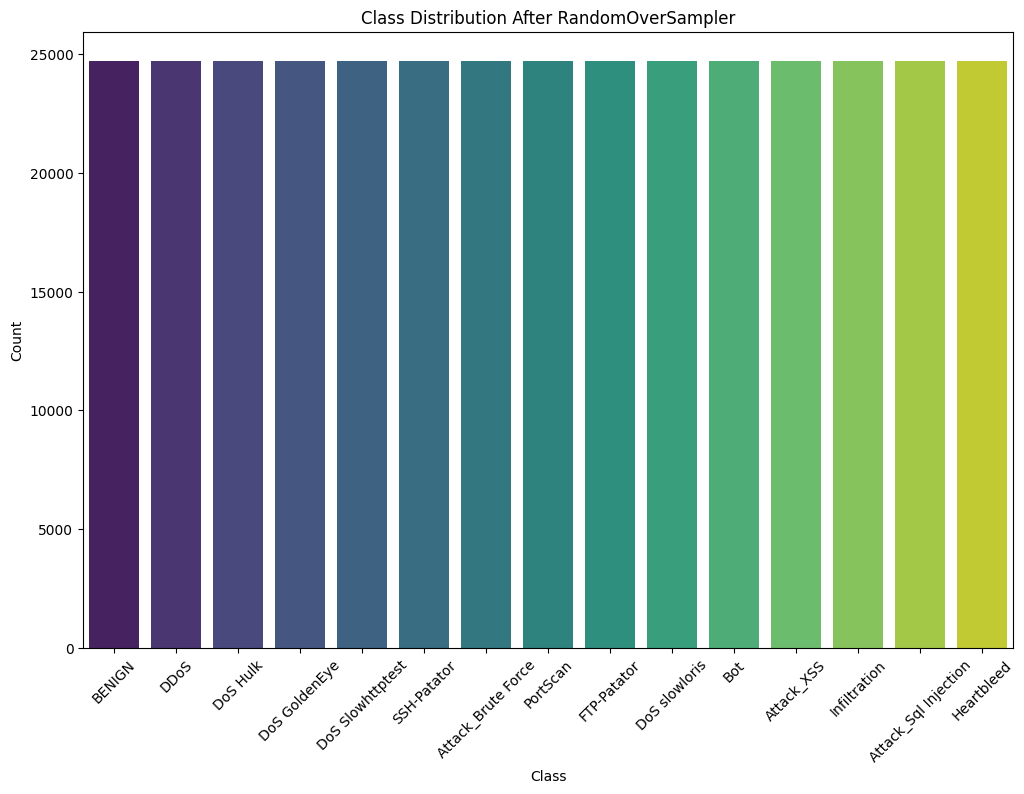

In [ ]:
# Converting resampling data to Data-Frame
resampled_df=ppd.DataFrame(X_mpled,columns=[f'Feature_{i}' for i in range(X_mpled.shape[1])])
# Plotting the class distri-bution
resampled_df[' Label']=y_mpled

# creating the counting graph using the particular information
classes=['BENIGN', 'DDoS', 'DoS Hulk', 'DoS GoldenEye', 'DoS Slowhttptest', 'SSH-Patator', 'Attack_Brute Force', 'PortScan', 'FTP-Patator',
         'DoS slowloris', 'Bot', 'Attack_XSS', 'Infiltration', 'Attack_Sql Injection', 'Heartbleed']

#Giving the size of the figures with the parameter.
mpl.figure(figsize=(12, 8))
# drawing the counting plot of with specific para-meter
sns.countplot(x=' Label',data=resampled_df,palette='viridis')

# setting the tittles of the graph
mpl.title('Class Distribution After RandomOverSampler')
# printing the x-labls in the plot
mpl.xlabel('Class')
# adding the labls in the plot
mpl.ylabel('Count')

# Set custom x-axis labelling
mpl.xticks(ticks=range(len(classes)),labels=classes,rotation=45)

# visualizing the dataset
mpl.show()


# Splitting Training & Testing

In [ ]:
#Using the modified data, creating trained and assessment dta sets.
X_train,X_test,y_train,y_test=train_test_split(X_mpled,y_mpled,test_size=0.2,random_state=42)

# Define Function

A classification is assessed by the function evaluate_result, which accepts as inputs the true labels (y_true), forecasted labels (y_pred), as well as optionally predicted probabilities (y_pred_proba). The four primary metrics that are computed and shown are accuracy, precision (weighted), recall (weighted), as well as F1 score (weighted). It then produces a report on categorization, which it publishes. It also computes and uses a heatmap to illustrate the confusion matrix, showing the real vs predicted labels along with labeled axes along with a title. This function gives the categorization model performance insights that are both numerical and visual.

In [ ]:
def evaluate_result(y_true,y_pred,y_pred_proba=None):
    # evalute the accu from the data
    print("Accuracy: {:.8f}".format(accuracy_score(y_true,y_pred)))

    # use the testing data to compute the preci-vlaue
    print("Precision: {:.8f}".format(precision_score(y_true,y_pred,average='weighted')))

    # get the reca-value withe the data
    print("Recall: {:.8f}".format(recall_score(y_true,y_pred,average='weighted')))

    # discover the f1socre's value
    print("F1_Score: {:.8f}".format(f1_score(y_true,y_pred,average='weighted')))

    print('========================================================================')
    # Drawing the classied tabel with the result
    report=classification_report(y_true,y_pred)
    # showing the result table
    print("Classification Report:\n", report)

    print('========================================================================')
    # drawing the matrics of plot confusing
    cm=confusion_matrix(y_true,y_pred)
    # sketch the data's perplexing matrices
    mpl.figure(figsize=(10,6))
    # applying the model's xlabel printing
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False)
    # use the y label in the graph
    mpl.xlabel("Predicted")
    # show the header in the graph
    mpl.ylabel("True")
    # adding tittles in the graph
    mpl.title("Confusion Matrix")
    # displaying the matrix
    mpl.show()


To depict the Receiver Operating Characteristic (ROC) curves for a classification with multiple classes problem, this code defines the plot_multiclass_roc function. In order to compute the ROC curve, the area under the curve scores, and binary labels, it first imports the required libraries from sklearn. Next, the function receives as inputs the predicted probabilities (y_pred_proba) and true labels (y_true). It does this by converting the true labels into a binary format, calculating for every class, and then outputting the AUC (Area Under the Curve) for every class. Additionally, it computes the AUC for the micro-average of the ROC curve, essentially aggregates all classes.The function then creates a plot of the ROC curve for each class in various colors, adds a micro-average curve, as well as presents the plot with the relevant labels, titles, and legends.

In [ ]:
# importing the libray with the result
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc(y_true, y_pred_proba):
    # show the chamber of the data
    n_classes = y_pred_proba.shape[1]

    # Converting the labels to binary output.
    y_true_bin=label_binarize(y_true,classes=nym.arange(n_classes))

    #Calculating each class's ROC curve as well as ROC AUC
    fpr = {}
    tpr = {}
    roc_auc = {}
    #Computing the curve by looping through
    for i in range(n_classes):
       #Determining the socre measurements as the estimator's probability
        fpr[i],tpr[i], _ = roc_curve(y_true_bin[:, i],y_pred_proba[:, i])
        # Identifying the values in the graph's categories
        roc_auc[i]=auc(fpr[i],tpr[i])
        # With eight decimal places of precision, print every ROC-AUC score associated with the i-th class.
        print(f"Class {i} ROC-AUC: {roc_auc[i]:.8f}")

    #Finding the location under the curve by flattening the real basic labels.
    fpr["micro"],tpr["micro"], _ =roc_curve(y_true_bin.ravel(),y_pred_proba.ravel())
    # Calculating the AUC for the curve.
    roc_auc["micro"]=auc(fpr["micro"], tpr["micro"])
    # Printing the ROC-verage score with eight decimal places.
    print(f"Micro-average ROC-AUC: {roc_auc['micro']:.8f}")

    # Plotting all ROC curves
    mpl.figure(figsize=(10, 8))
    # Generating a list of colors using the rainbow colormap
    colors = mpl.cm.rainbow(nym.linspace(0, 1, n_classes))
    # Iterating over every class and matching color
    for i, color in zip(range(n_classes), colors):
        #displaying the ROC shape for every class along with the matching color
        mpl.plot(fpr[i],tpr[i],color=color,lw=2,label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
    # A performance metric that is aggregated across all classes is the plotted curve.
    mpl.plot(fpr["micro"],tpr["micro"],color='navy',lw=2,linestyle=':',label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})')
    # To illustrate a random classifier, draw a line down the as (1, 1).
    mpl.plot([0, 1],[0, 1],color='gray',linestyle='--')
    #Adding labels to the x-lbls in the plots
    mpl.xlim([0.0, 1.0])
    # Setting the y-axis limits to range from 0.0 to 1.05 to allow for some space
    mpl.ylim([0.0, 1.05])
    # Setting the x-labls in the graph
    mpl.xlabel('False Positive Rate')
    # adding the y-axis labls as the plot
    mpl.ylabel('True Positive Rate')
    #printing the titrtles of the plot
    mpl.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
    # Adding a legending to the plot
    mpl.legend(loc="lower right")
    # visualizing the graph
    mpl.show()

# Reshaping Dataset

In [ ]:
# Reshaping the trained information to add a third dimension
x_train_reshaped=X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
# Add a third dimension and data in a similar way.
x_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [ ]:
# Importing the function from the algorithm resources.
from tensorflow.keras.utils import to_categorical
# Converted the trained labels to categorical format (one-hot encoding)
y_train_categorical=to_categorical(y_train)
# Transform the testing labels into a categorical representation using one-hot encoding.
y_test_categorical=to_categorical(y_test)

# CNN-BILSTM Model.

In [ ]:
# Importing necessary libraries for hyperparameter optimization and neural network modeling.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Bidirectional, LSTM, Dropout, Activation, Reshape

# Building the neural network model.
alg = Sequential()

# Initial Conv1D layer with 64 filters and kernel size 5.
alg.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(x_train_reshaped.shape[1], 1)))

# MaxPooling1D layer to reduce dimensionality.
alg.add(MaxPooling1D(pool_size=2))

# Batch Normalization to stabilize learning.
alg.add(BatchNormalization())

# Bidirectional LSTM layer with 128 units.
alg.add(Bidirectional(LSTM(128)))

# Reshaping the output for compatibility with the next layers.
# The output shape of the Bidirectional LSTM is (None, 256).
# To be compatible with the next MaxPooling1D layer, we need to reshape it to (None, 128, 2).
alg.add(Reshape((128, 2)))

# Another MaxPooling1D layer to further reduce dimensionality.
alg.add(MaxPooling1D(pool_size=2))

# Additional Batch Normalization layer.
alg.add(BatchNormalization())

# Second Bidirectional LSTM layer with 256 units.
alg.add(Bidirectional(LSTM(256)))

# Dropout layer to prevent overfitting.
alg.add(Dropout(0.5))

# Dense layer to process features before final classification.
alg.add(Dense(15))

# Applying activation function for final class prediction.
alg.add(Activation('softmax'))

# Compiling the model.
alg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model.
history = alg.fit(x_train_reshaped, y_train_categorical, epochs=5, batch_size=32, validation_data=(x_test_reshaped, y_test_categorical))

Epoch 1/5
9269/9269 ━━━━━━━━━━━━━━━━━━━━ 197s 20ms/step - accuracy: 0.8433 - loss: 0.4224 - val_accuracy: 0.9134 - val_loss: 0.1729
Epoch 2/5
9269/9269 ━━━━━━━━━━━━━━━━━━━━ 183s 19ms/step - accuracy: 0.9166 - loss: 0.1816 - val_accuracy: 0.9220 - val_loss: 0.1622
Epoch 3/5
9269/9269 ━━━━━━━━━━━━━━━━━━━━ 172s 19ms/step - accuracy: 0.9211 - loss: 0.1648 - val_accuracy: 0.8731 - val_loss: 0.2422
Epoch 4/5
9269/9269 ━━━━━━━━━━━━━━━━━━━━ 200s 18ms/step - accuracy: 0.9245 - loss: 0.1564 - val_accuracy: 0.9211 - val_loss: 0.1454
Epoch 5/5
9269/9269 ━━━━━━━━━━━━━━━━━━━━ 170s 18ms/step - accuracy: 0.9274 - loss: 0.1482 - val_accuracy: 0.9248 - val_loss: 0.1326


In [ ]:
# Using the best performing model to determine labels to feed the simulated data.
trn_prd_cnn=alg.predict(x_train_reshaped)
#Taking the index and converting the anticipated probability to class labels.
y_tin_pred_classes=nym.argmax(trn_prd_cnn,axis=1)
#Translating the authentic labels into class labels.
tin_clases=nym.argmax(y_train_categorical,axis=1)

# applying the index to translate the anticipated probability into class labels.
y_test_pred=alg.predict(x_test_reshaped)
# Making the class labels from the genuine labels.
tst_ped_clases=nym.argmax(y_test_pred,axis=1)
# Predicted the categories for the experimental data using the most effective alg.
y_tst_clses=nym.argmax(y_test_categorical,axis=1)

9269/9269 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


In [ ]:
# getting the vlues for the the curved
y_train_roc=alg.predict(x_train_reshaped)
# obtaining the curved values for the
y_test_roc=alg.predict(x_test_reshaped)

9269/9269 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


# Testing Result

Accuracy: 0.92476903
Precision: 0.92919849
Recall: 0.92476903
F1_Score: 0.91601798
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      4934
           1       0.99      1.00      0.99      4946
           2       0.99      0.99      0.99      5013
           3       1.00      1.00      1.00      4941
           4       1.00      0.99      1.00      4837
           5       0.51      0.85      0.64      4916
           6       0.99      0.99      0.99      4942
           7       1.00      0.94      0.97      5036
           8       0.98      0.99      0.99      4888
           9       0.98      1.00      0.99      5001
          10       0.99      0.98      0.98      4977
          11       0.62      0.18      0.28      4882
          12       0.91      1.00      0.95      4949
          13       1.00      1.00      1.00      4935
          14       1.00      1.00      1.00      4948

    accuracy               

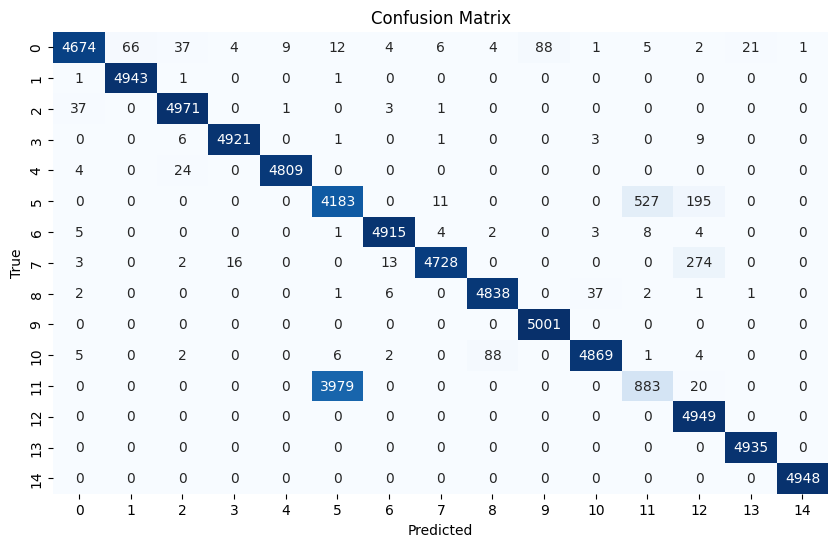

In [ ]:
evaluate_result(y_tst_clses,tst_ped_clases)

# F1-Score Graph

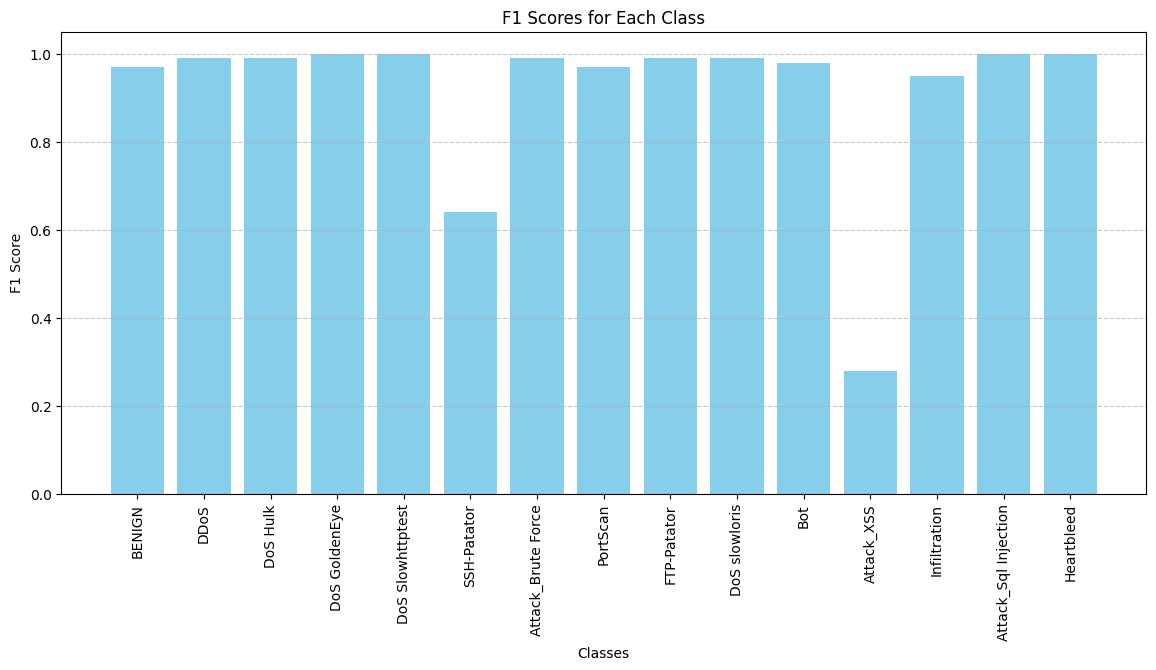

In [ ]:
# establishing the values of various algorithms.
f1_scores = [0.97, 0.99,0.99, 1.00, 1.00, 0.64, 0.99, 0.97, 0.99, 0.99, 0.98, 0.28, 0.95, 1.00, 1.00]

# Creating the bar graph
mpl.figure(figsize=(14, 6))
# drawing the graph of the para-meter
mpl.bar(classes,f1_scores,color='skyblue')
# setting the x-axis labelling
mpl.xlabel('Classes')
# getting the y-labeling the plot
mpl.ylabel('F1 Score')
# setting the tittles of the graph
mpl.title('F1 Scores for Each Class')
# Set y-axis limits from 0 to 1 for better visualization
# mpl.ylim(0, 1)
# Adding a grid to the graph
mpl.grid(axis='y',linestyle='--',alpha=0.7)
mpl.xticks(rotation=90)

# Showing the graph
mpl.show()

# Roc Curve

Class 0 ROC-AUC: 0.99804516
Class 1 ROC-AUC: 0.99975920
Class 2 ROC-AUC: 0.99996975
Class 3 ROC-AUC: 0.99989843
Class 4 ROC-AUC: 0.99999622
Class 5 ROC-AUC: 0.97520663
Class 6 ROC-AUC: 0.99991483
Class 7 ROC-AUC: 0.99917753
Class 8 ROC-AUC: 0.99980568
Class 9 ROC-AUC: 0.99996343
Class 10 ROC-AUC: 0.99966928
Class 11 ROC-AUC: 0.97766293
Class 12 ROC-AUC: 0.99838199
Class 13 ROC-AUC: 0.99999177
Class 14 ROC-AUC: 1.00000000
Micro-average ROC-AUC: 0.99916327


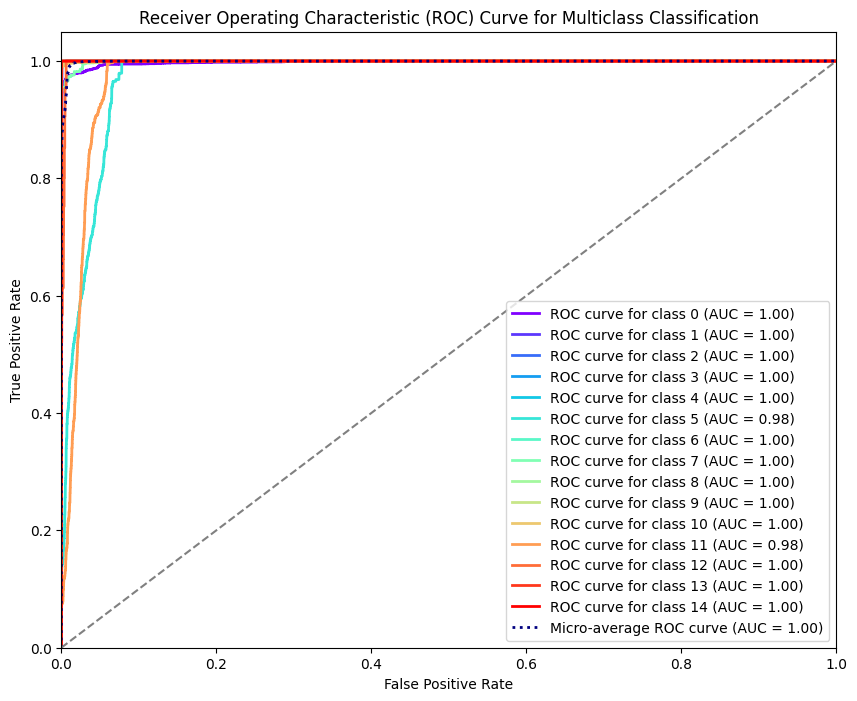

In [ ]:
plot_multiclass_roc(y_tst_clses,y_test_roc)

# Training Result

Accuracy: 0.92341695
Precision: 0.92844169
Recall: 0.92341695
F1_Score: 0.91434142
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97     19781
           1       0.99      1.00      0.99     19769
           2       0.98      0.99      0.99     19702
           3       0.99      1.00      1.00     19774
           4       1.00      0.99      1.00     19878
           5       0.51      0.85      0.64     19799
           6       1.00      0.99      0.99     19773
           7       0.99      0.94      0.96     19679
           8       0.98      0.99      0.98     19827
           9       0.98      1.00      0.99     19714
          10       0.99      0.98      0.98     19738
          11       0.63      0.18      0.28     19833
          12       0.91      1.00      0.95     19766
          13       0.99      1.00      1.00     19780
          14       1.00      1.00      1.00     19767

    accuracy               

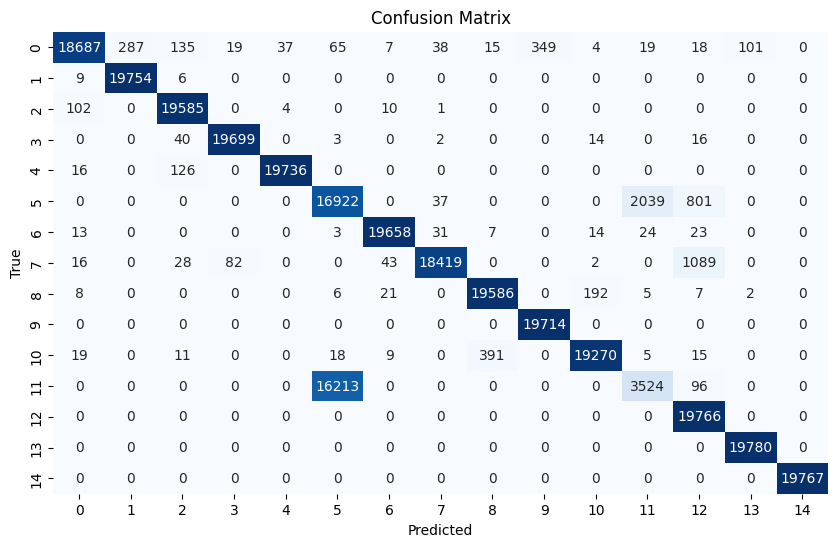

In [ ]:
evaluate_result(tin_clases,y_tin_pred_classes)

# F1-Score Graph

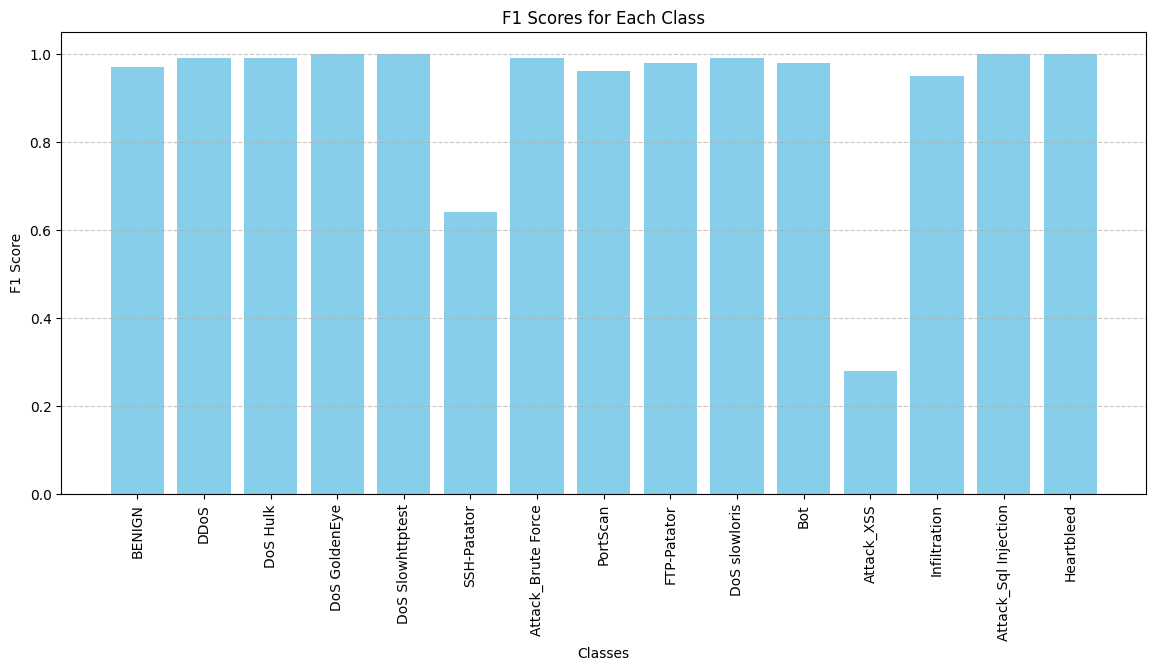

In [ ]:
# Identify the set of F1 scores for every class.
f1_scores = [0.97, 0.99, 0.99, 1.00, 1.00, 0.64, 0.99, 0.96, 0.98, 0.99, 0.98, 0.28, 0.95, 1.00, 1.00]

#providing the shape of figure
mpl.figure(figsize=(14, 6))
# drawing the graph of the para-meter
mpl.bar(classes, f1_scores, color='skyblue')
# setting the x-axis labelling
mpl.xlabel('Classes')
# getting the y-labeling the plot
mpl.ylabel('F1 Score')
# setting the tittles of the graph
mpl.title('F1 Scores for Each Class')
# Including a grid in the diagram
mpl.grid(axis='y',linestyle='--',alpha=0.7)
mpl.xticks(rotation=90)
# visualizing the graph
mpl.show()

# Roc Curve

Class 0 ROC-AUC: 0.99809002
Class 1 ROC-AUC: 0.99974357
Class 2 ROC-AUC: 0.99995573
Class 3 ROC-AUC: 0.99993936
Class 4 ROC-AUC: 0.99999659
Class 5 ROC-AUC: 0.97478366
Class 6 ROC-AUC: 0.99988513
Class 7 ROC-AUC: 0.99914481
Class 8 ROC-AUC: 0.99980502
Class 9 ROC-AUC: 0.99996574
Class 10 ROC-AUC: 0.99972470
Class 11 ROC-AUC: 0.97745956
Class 12 ROC-AUC: 0.99837455
Class 13 ROC-AUC: 0.99999889
Class 14 ROC-AUC: 1.00000000
Micro-average ROC-AUC: 0.99914288


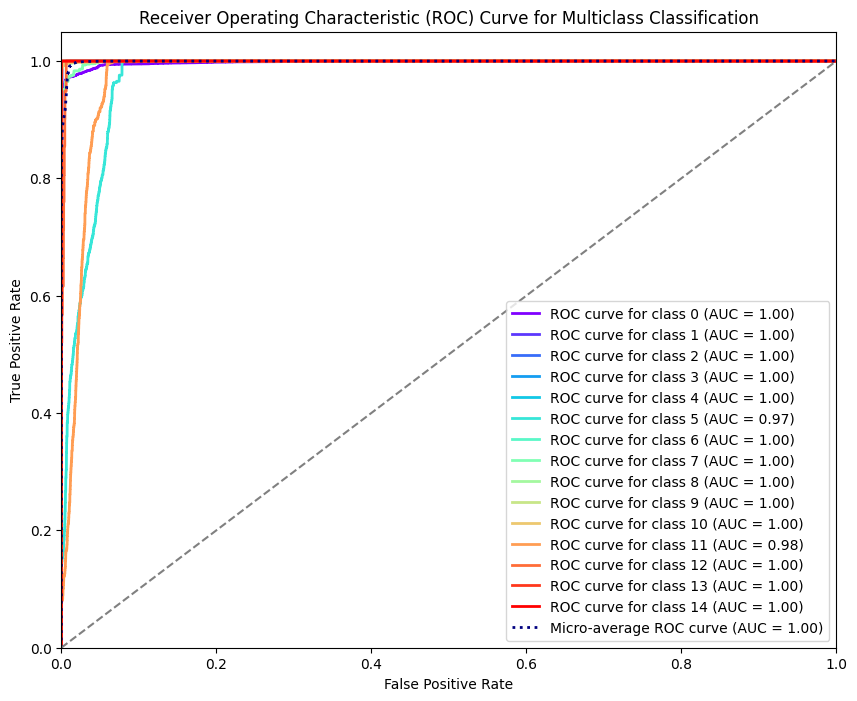

In [ ]:
plot_multiclass_roc(tin_clases,y_train_roc)

# **Before** **Balancing**

In [ ]:
#Using the modified data, creating training and assessment data sets.
X_train_un,X_test_un,y_train_un,y_test_un=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

# Reshaping Data

In [ ]:
# Reshaping the trained information to add a third dimension
x_train_reshaped_un=X_train_un.reshape(X_train_un.shape[0], X_train_un.shape[1], 1)
# Add a third dimension and data in a similar way.
x_test_reshaped_un=X_test_un.reshape(X_test_un.shape[0], X_test_un.shape[1], 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
# Converted the trained labels to categorical format (one-hot encoding)
y_train_categorical_un=to_categorical(y_train_un)
# Transform the testing labels into a categorical representation using one-hot encoding.
y_test_categorical_un=to_categorical(y_test_un)

In [ ]:
y_test_categorical_un.shape

(20775, 15)

# CNN-BILSTM Model.

In [ ]:
# Importing necessary libraries for hyperparameter optimization and neural network modeling.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Bidirectional, LSTM, Dropout, Activation, Reshape

# Building the neural network model.
alg = Sequential()

# Initial Conv1D layer with 64 filters and kernel size 5.
alg.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(x_train_reshaped.shape[1], 1)))

# MaxPooling1D layer to reduce dimensionality.
alg.add(MaxPooling1D(pool_size=2))

# Batch Normalization to stabilize learning.
alg.add(BatchNormalization())

# Bidirectional LSTM layer with 128 units.
alg.add(Bidirectional(LSTM(128)))

# Reshaping the output for compatibility with the next layers.
# The output shape of the Bidirectional LSTM is (None, 256).
# To be compatible with the next MaxPooling1D layer, we need to reshape it to (None, 128, 2).
alg.add(Reshape((128, 2)))

# Another MaxPooling1D layer to further reduce dimensionality.
alg.add(MaxPooling1D(pool_size=2))

# Additional Batch Normalization layer.
alg.add(BatchNormalization())

# Second Bidirectional LSTM layer with 256 units.
alg.add(Bidirectional(LSTM(256)))

# Dropout layer to prevent overfitting.
alg.add(Dropout(0.5))

# Dense layer to process features before final classification.
alg.add(Dense(15))

# Applying activation function for final class prediction.
alg.add(Activation('softmax'))

# Compiling the model.
alg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model.
history = alg.fit(x_train_reshaped_un, y_train_categorical_un, epochs=5, batch_size=32, validation_data=(x_test_reshaped_un, y_test_categorical_un))

Epoch 1/5
2597/2597 ━━━━━━━━━━━━━━━━━━━━ 63s 23ms/step - accuracy: 0.8447 - loss: 0.4980 - val_accuracy: 0.9244 - val_loss: 0.2007
Epoch 2/5
2597/2597 ━━━━━━━━━━━━━━━━━━━━ 71s 19ms/step - accuracy: 0.9517 - loss: 0.1437 - val_accuracy: 0.9590 - val_loss: 0.1161
Epoch 3/5
2597/2597 ━━━━━━━━━━━━━━━━━━━━ 87s 21ms/step - accuracy: 0.9587 - loss: 0.1207 - val_accuracy: 0.9615 - val_loss: 0.1158
Epoch 4/5
2597/2597 ━━━━━━━━━━━━━━━━━━━━ 76s 19ms/step - accuracy: 0.9626 - loss: 0.1108 - val_accuracy: 0.9643 - val_loss: 0.1196
Epoch 5/5
2597/2597 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9654 - loss: 0.1008 - val_accuracy: 0.9720 - val_loss: 0.0897


In [ ]:
# Using the best performing model to determine categories for the data being simulated
tan_ped_cn = alg.predict(x_train_reshaped_un)
# Translating the anticipated probability into class labels
tran_prd_clases = nym.argmax(tan_ped_cn, axis=1)
#Translating the authentic labels into class labels
cnn_tin_clases = nym.argmax(y_train_categorical_un, axis=1)

# Predicted the categories for the experimental data using the most effective model
y_tst_ped_lst = alg.predict(x_test_reshaped_un)
#Taking the index and converting the anticipated probability to class labels
cn_tst_prd_clsses = nym.argmax(y_tst_ped_lst, axis=1)
# Making the class labels from the genuine labels
x_tst_clases = nym.argmax(y_test_categorical_un, axis=1)

2597/2597 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


In [ ]:
y_train_prob=alg.predict(x_train_reshaped_un)
y_test_prob=alg.predict(x_test_reshaped_un)

2597/2597 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


# Testing Result

Accuracy: 0.97198556
Precision: 0.97193368
Recall: 0.97198556
F1_Score: 0.96927943
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      4977
           1       0.98      1.00      0.99      2814
           2       0.98      1.00      0.99      3544
           3       0.97      0.99      0.98      1191
           4       1.00      0.99      0.99      2510
           5       0.68      0.92      0.78       293
           6       0.99      1.00      1.00      2115
           7       0.96      0.97      0.97       640
           8       0.99      0.99      0.99      1083
           9       0.95      0.67      0.79       366
          10       0.99      0.97      0.98      1105
          11       0.75      0.03      0.05       119
          12       0.00      0.00      0.00         3
          13       0.69      0.64      0.67        14
          14       0.00      0.00      0.00         1

    accuracy               

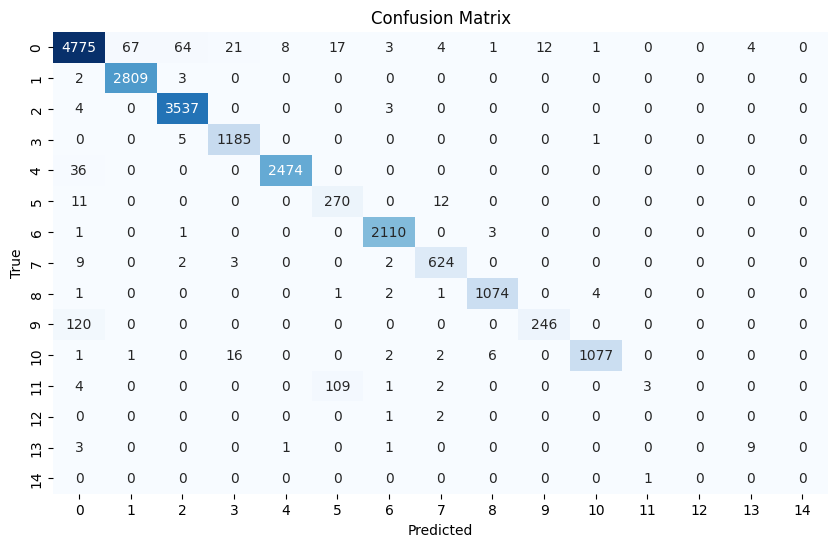

In [ ]:
evaluate_result(x_tst_clases,cn_tst_prd_clsses)

# F1-Score Graph

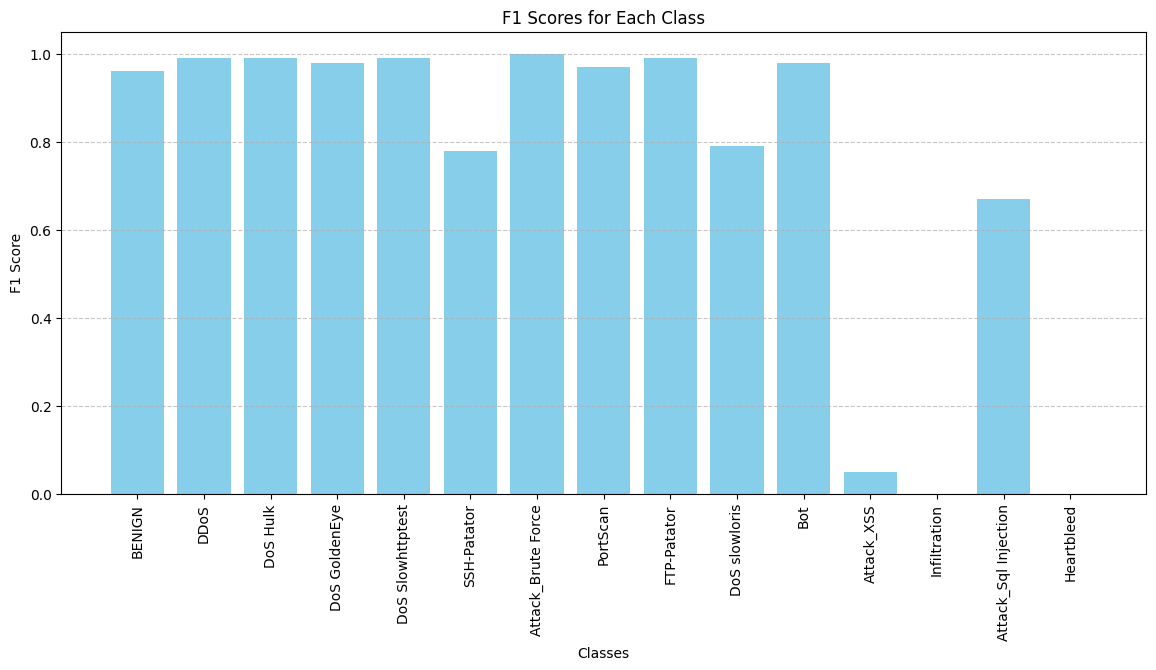

In [ ]:
# Define the list of F1 scores corresponding to each class.
f1_scores = [0.96, 0.99, 0.99, 0.98, 0.99, 0.78, 1.00, 0.97, 0.99, 0.79, 0.98, 0.05, 0.00, 0.67, 0.00]
#Make a new plotting figure that is 14 by 6 inches in dimension.
mpl.figure(figsize=(14, 6))
#Plot-ting the class desinations on the x-axis of a bar chart
mpl.bar(classes, f1_scores, color='skyblue')
# getting the x-label in the plot
mpl.xlabel('Classes')
# obtaining the plot's y-axis label
mpl.ylabel('F1 Score')
# print the header text in the plot
mpl.title('F1 Scores for Each Class')
# adding the gridding the values
mpl.grid(axis='y',linestyle='--',alpha=0.7)
mpl.xticks(rotation=90)
# showing the graph
mpl.show()

# Roc Curve

Class 0 ROC-AUC: 0.99649252
Class 1 ROC-AUC: 0.99904037
Class 2 ROC-AUC: 0.99983791
Class 3 ROC-AUC: 0.99993410
Class 4 ROC-AUC: 0.99993801
Class 5 ROC-AUC: 0.99730788
Class 6 ROC-AUC: 0.99995367
Class 7 ROC-AUC: 0.99905249
Class 8 ROC-AUC: 0.99969732
Class 9 ROC-AUC: 0.99659819
Class 10 ROC-AUC: 0.99964808
Class 11 ROC-AUC: 0.99410796
Class 12 ROC-AUC: 0.99595609
Class 13 ROC-AUC: 0.97672490
Class 14 ROC-AUC: 1.00000000
Micro-average ROC-AUC: 0.99955649


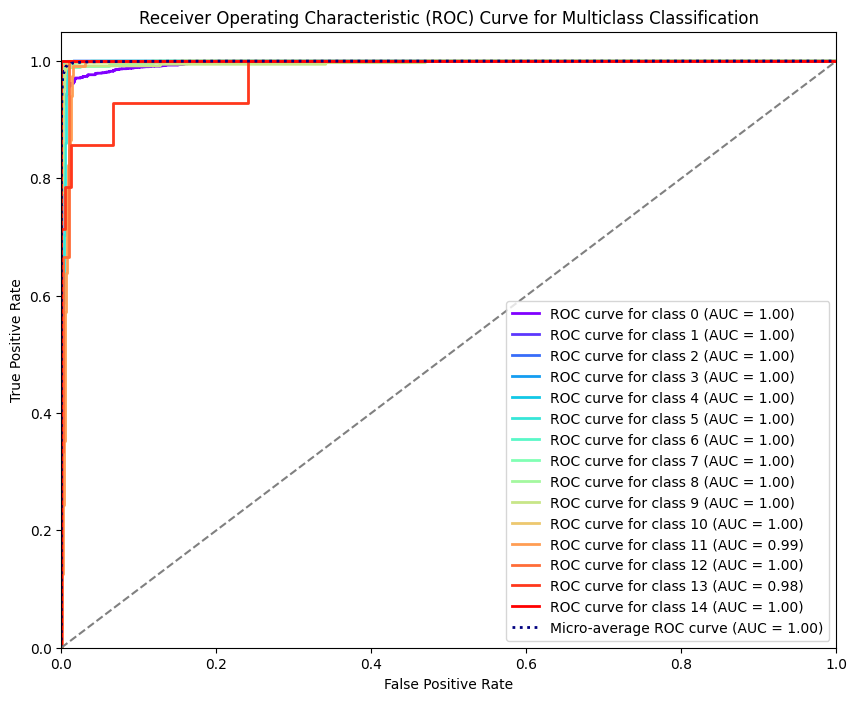

In [ ]:
plot_multiclass_roc(x_tst_clases,y_test_prob)

# Training Result

Accuracy: 0.97018015
Precision: 0.96952604
Recall: 0.97018015
F1_Score: 0.96736454
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     19738
           1       0.97      1.00      0.99     11669
           2       0.98      1.00      0.99     14144
           3       0.97      1.00      0.98      4740
           4       1.00      0.99      0.99     10291
           5       0.65      0.93      0.77      1177
           6       0.99      1.00      0.99      8171
           7       0.97      0.95      0.96      2579
           8       0.99      0.99      0.99      4145
           9       0.96      0.71      0.81      1582
          10       0.99      0.97      0.98      4280
          11       0.59      0.02      0.05       533
          12       0.00      0.00      0.00        18
          13       0.63      0.77      0.69        22
          14       1.00      0.10      0.18        10

    accuracy               

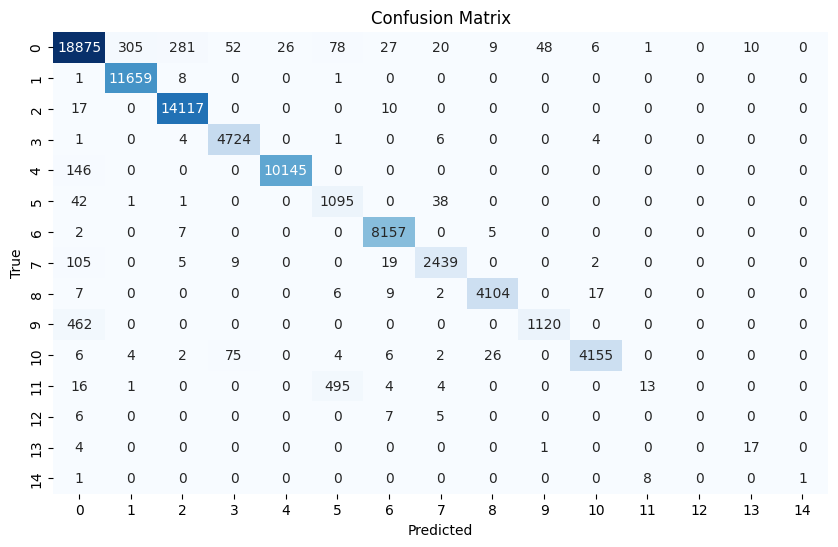

In [ ]:
evaluate_result(cnn_tin_clases,tran_prd_clases)

# F1-score Graph

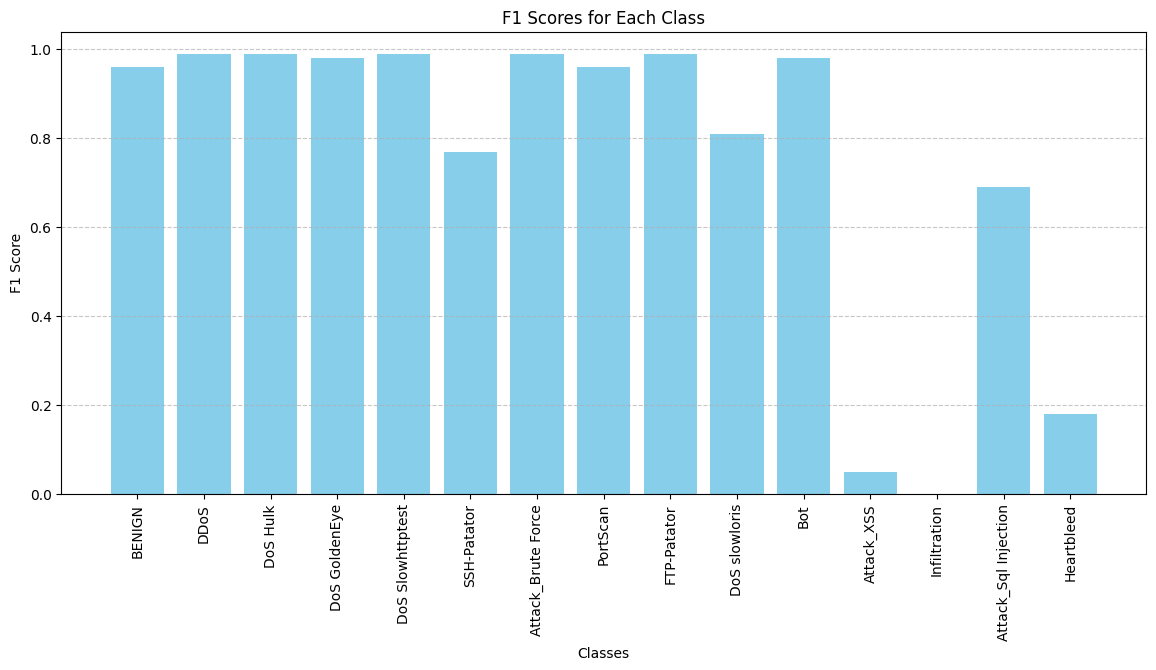

In [ ]:
f1_scores=[0.96, 0.99, 0.99, 0.98, 0.99, 0.77, 0.99, 0.96, 0.99, 0.81, 0.98, 0.05, 0.00, 0.69, 0.18]

# giving the size of the plot with vlues
mpl.figure(figsize=(14,6))
# getting the plot of the specific para-meter
mpl.bar(classes,f1_scores,color='skyblue')
mpl.xlabel('Classes')
# getting the y-labeling the plot
mpl.ylabel('F1 Score')
# setting the tittles of the graph
mpl.title('F1 Scores for Each Class')
# Including a grid in the diagram
mpl.grid(axis='y',linestyle='--',alpha=0.7)
mpl.xticks(rotation=90)
# visualizing the graph
# Display the storyline'k'
mpl.show()

# Roc Curve

Class 0 ROC-AUC: 0.99645259
Class 1 ROC-AUC: 0.99901032
Class 2 ROC-AUC: 0.99985274
Class 3 ROC-AUC: 0.99995007
Class 4 ROC-AUC: 0.99997002
Class 5 ROC-AUC: 0.99702801
Class 6 ROC-AUC: 0.99997697
Class 7 ROC-AUC: 0.99935504
Class 8 ROC-AUC: 0.99976495
Class 9 ROC-AUC: 0.99901400
Class 10 ROC-AUC: 0.99953223
Class 11 ROC-AUC: 0.99403304
Class 12 ROC-AUC: 0.99667259
Class 13 ROC-AUC: 0.99801772
Class 14 ROC-AUC: 0.99999880
Micro-average ROC-AUC: 0.99966911


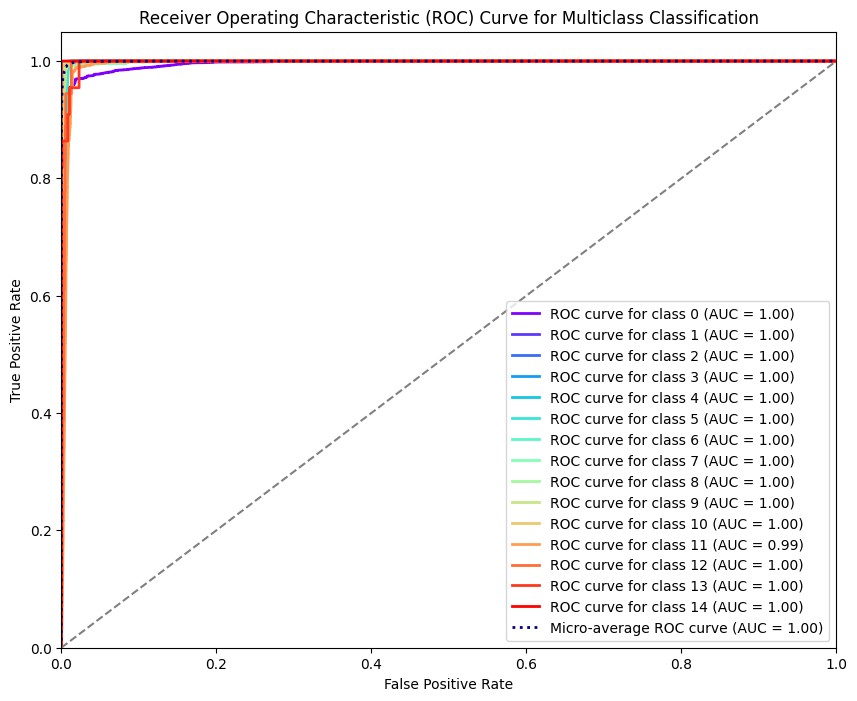

In [ ]:
plot_multiclass_roc(cnn_tin_clases,y_train_prob)